In [1]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=cebfd173bd7a27e4e5502e7d44b654b062eb100dfc8a9e3b07e5598f3f522e9a
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prathakkumar","key":"0a6a48b8ec5f4be020c8553dec208009"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c favorita-grocery-sales-forecasting

 97% 442M/458M [00:08<00:00, 62.5MB/s]
100% 458M/458M [00:08<00:00, 54.9MB/s]


In [5]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [6]:
!ls
!unzip favorita-grocery-sales-forecasting.zip
!ls

favorita-grocery-sales-forecasting.zip	kaggle.json  sample_data
Archive:  favorita-grocery-sales-forecasting.zip
  inflating: holidays_events.csv.7z  
  inflating: items.csv.7z            
  inflating: oil.csv.7z              
  inflating: sample_submission.csv.7z  
  inflating: stores.csv.7z           
  inflating: test.csv.7z             
  inflating: train.csv.7z            
  inflating: transactions.csv.7z     
favorita-grocery-sales-forecasting.zip	sample_submission.csv.7z
holidays_events.csv.7z			stores.csv.7z
items.csv.7z				test.csv.7z
kaggle.json				train.csv.7z
oil.csv.7z				transactions.csv.7z
sample_data


In [7]:
!p7zip -d holidays_events.csv.7z  
!p7zip -d items.csv.7z            
!p7zip -d oil.csv.7z              
!p7zip -d sample_submission.csv.7z  
!p7zip -d stores.csv.7z           
!p7zip -d test.csv.7z             
!p7zip -d train.csv.7z            
!p7zip -d transactions.csv.7z
!ls


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1898 bytes (2 KiB)

Extracting archive: holidays_events.csv.7z
--
Path = holidays_events.csv.7z
Type = 7z
Physical Size = 1898
Headers Size = 146
Method = LZMA2:24k
Solid = -
Blocks = 1

  0%    Everything is Ok

Size:       22309
Compressed: 1898

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 14315 bytes (14 KiB)

Extracting archive: items.csv.7z
--
Path = items.csv.7z
Type = 7z
Physical Size = 14315
Headers Size = 122
Method = LZMA2:17
Solid = -
Blocks = 1

  0%    E

In [0]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

import datetime
from datetime import date, timedelta

In [0]:
dtypes = {'store_nbr': np.dtype('int64'),
          'item_nbr': np.dtype('int64'),
          'unit_sales': np.dtype('float64'),
          'onpromotion': np.dtype('O')}

train = pd.read_csv('train.csv', dtype=dtypes)
test = pd.read_csv('test.csv', dtype=dtypes)
stores = pd.read_csv('stores.csv')
items = pd.read_csv('items.csv')
trans = pd.read_csv('transactions.csv')
holidays = pd.read_csv('holidays_events.csv')

In [10]:
date_mask = (train['date'] >= '2017-07-15') & (train['date'] <= '2017-08-15')
pd_train = train[date_mask]

len(pd_train)

3359566

In [0]:
oil = pd.read_csv('oil.csv')

min_oil_date = min(pd_train.date)
max_oil_date = max(pd_train.date)

calendar = []

d1 = datetime.datetime.strptime(min_oil_date, '%Y-%m-%d')  
d2 = datetime.datetime.strptime(max_oil_date, '%Y-%m-%d')  

delta = d2 - d1        

for i in range(delta.days + 1):
    calendar.append(datetime.date.strftime(d1 + timedelta(days=i), '%Y-%m-%d'))

calendar = pd.DataFrame({'date':calendar})

oil = calendar.merge(oil, left_on='date', right_on='date', how='left')

In [12]:
print(oil.isnull().sum(), '\n')

print('Type : ', '\n', oil.dtypes)

oil.head(5)

date           0
dcoilwtico    10
dtype: int64 

Type :  
 date           object
dcoilwtico    float64
dtype: object


,date,dcoilwtico
0,2017-07-15,NaN
1,2017-07-16,NaN
2,2017-07-17,46.02
3,2017-07-18,46.40
4,2017-07-19,47.10


In [0]:
na_index_oil = oil[oil['dcoilwtico'].isnull() == True].index.values

na_index_oil_plus = na_index_oil.copy()
na_index_oil_minus = np.maximum(0, na_index_oil-1)

for i in range(len(na_index_oil)):
    k = 1
    while (na_index_oil[min(i+k,len(na_index_oil)-1)] == na_index_oil[i]+k):
        k += 1
    na_index_oil_plus[i] = min(len(oil)-1, na_index_oil_plus[i] + k )

for i in range(len(na_index_oil)):
    if (na_index_oil[i] == 0):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_plus[i], 'dcoilwtico']
    elif (na_index_oil[i] == len(oil)):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_minus[i], 'dcoilwtico']
    else:
        oil.loc[na_index_oil[i], 'dcoilwtico'] = (oil.loc[na_index_oil_plus[i], 'dcoilwtico'] + oil.loc[na_index_oil_minus[i], 'dcoilwtico'])/ 2   

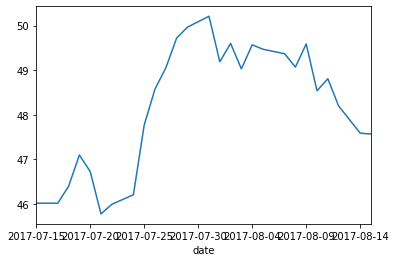

In [14]:
oil_plot = oil['dcoilwtico'].copy()
oil_plot.index = oil['date'].copy()
oil_plot.plot()
plt.show()

In [0]:
pd_train = pd_train.drop('id', axis = 1)
pd_train = pd_train.merge(stores, left_on='store_nbr', right_on='store_nbr', how='left')
pd_train = pd_train.merge(items, left_on='item_nbr', right_on='item_nbr', how='left')
pd_train = pd_train.merge(holidays, left_on='date', right_on='date', how='left')
pd_train = pd_train.merge(oil, left_on='date', right_on='date', how='left')
pd_train = pd_train.drop(['description', 'state', 'locale_name', 'class'], axis = 1)

In [16]:
print('Shape : ', pd_train.shape, '\n')

print('Type : ', '\n', pd_train.dtypes)

pd_train.describe()

Shape :  (3359566, 14) 

Type :  
 date            object
store_nbr        int64
item_nbr         int64
unit_sales     float64
onpromotion     object
city            object
type_x          object
cluster          int64
family          object
perishable       int64
type_y          object
locale          object
transferred     object
dcoilwtico     float64
dtype: object


,store_nbr,item_nbr,unit_sales,cluster,perishable,dcoilwtico
count,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06
mean,2.831059e+01,1.171591e+06,8.053185e+00,8.703191e+00,2.580432e-01,4.814635e+01
std,1.630974e+01,5.871905e+05,2.371664e+01,4.566465e+00,4.375579e-01,1.468388e+00
min,1.000000e+00,9.699500e+04,-2.410000e+02,1.000000e+00,0.000000e+00,4.578000e+01
25%,1.300000e+01,6.925310e+05,2.000000e+00,5.000000e+00,0.000000e+00,4.640000e+01
50%,2.900000e+01,1.212452e+06,4.000000e+00,9.000000e+00,0.000000e+00,4.858000e+01
75%,4.400000e+01,1.583407e+06,8.000000e+00,1.300000e+01,1.000000e+00,4.947000e+01
max,5.400000e+01,2.127114e+06,5.901000e+03,1.700000e+01,1.000000e+00,5.021000e+01


In [17]:
pd_train.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
2216206,2017-08-05,3,252970,6.000,False,Quito,D,8,CLEANING,0,Holiday,Local,False,49.4700
3050122,2017-08-13,2,1057033,11.000,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,47.8950
546321,2017-07-20,8,1127860,3.000,False,Quito,D,8,GROCERY I,0,NaN,NaN,NaN,46.7300
2208447,2017-08-04,52,2028217,17.000,False,Manta,A,11,BEVERAGES,0,NaN,NaN,NaN,49.5700
3081601,2017-08-13,18,2087543,8.000,False,Quito,B,16,DAIRY,1,NaN,NaN,NaN,47.8950
2595619,2017-08-08,34,1017349,7.676,False,Guayaquil,B,6,MEATS,1,NaN,NaN,NaN,49.0700
270840,2017-07-17,26,1584576,3.000,False,Guayaquil,D,10,PRODUCE,1,NaN,NaN,NaN,46.0200
1682082,2017-07-30,54,2010568,6.000,False,El Carmen,C,3,GROCERY I,0,NaN,NaN,NaN,50.0875
1243485,2017-07-26,47,2047496,5.000,False,Quito,A,14,BEVERAGES,0,NaN,NaN,NaN,48.5800
1478347,2017-07-29,9,378330,5.000,False,Quito,B,6,GROCERY I,0,NaN,NaN,NaN,49.9650


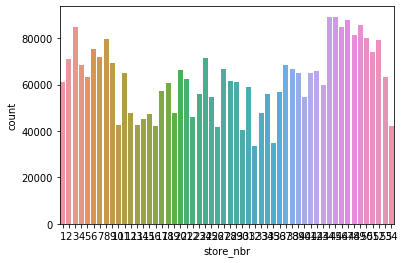

In [18]:
sns.countplot(x='store_nbr', data=pd_train);

In [19]:
def N_most_labels(data, variable , N , all='TRUE'):
    labels_freq_pd = itemfreq(data[variable])
    labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]]
    
    if all == 'FALSE':
        main_labels = labels_freq_pd[:,0][0:N]
    else: 
        main_labels = labels_freq_pd[:,0][:]
        
    labels_raw_np = data[variable].as_matrix()
    labels_raw_np = labels_raw_np.reshape(labels_raw_np.shape[0],1)

    labels_filtered_index = np.where(labels_raw_np == main_labels)
    
    return labels_freq_pd, labels_filtered_index

label_freq, labels_filtered_index = N_most_labels(data = pd_train, variable = "item_nbr", N = 10, all='FALSE')
print("labels_filtered_index[0].shape = ", labels_filtered_index[0].shape)

pd_train_filtered = pd_train.loc[labels_filtered_index[0],:]
print("pd_train_filtered.shape = ", pd_train_filtered.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


labels_filtered_index[0].shape =  (17202,)
pd_train_filtered.shape =  (17202, 14)


In [20]:
pd_train_filtered.sample(3)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
2941689,2017-08-11,54,414750,1.0,False,El Carmen,C,3,GROCERY I,0,Transfer,National,False,48.81
109949,2017-07-15,54,414750,2.0,False,El Carmen,C,3,GROCERY I,0,NaN,NaN,NaN,46.02
3174180,2017-08-14,10,323013,4.0,False,Quito,C,15,GROCERY I,0,NaN,NaN,NaN,47.59


In [21]:
na_index_pd_train = pd_train_filtered[pd_train_filtered['type_y'].isnull() == True].index.values
print("Size of na_index_pd_train : ", len(na_index_pd_train), '\n')

pd_train_filtered.loc[pd_train_filtered['type_y'].isnull(), 'type_y'] = "no_holyday"
pd_train_filtered.loc[pd_train_filtered['locale'].isnull(), 'locale'] = "no_holyday"
pd_train_filtered.loc[pd_train_filtered['transferred'].isnull(), 'transferred'] = "no_holyday"
    
pd_train_filtered.isnull().sum()

Size of na_index_pd_train :  13439 



date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
city           0
type_x         0
cluster        0
family         0
perishable     0
type_y         0
locale         0
transferred    0
dcoilwtico     0
dtype: int64

In [0]:
def get_month_year(df):
    df['month'] = df.date.apply(lambda x: x.split('-')[1])
    df['year'] = df.date.apply(lambda x: x.split('-')[0])
    
    return df

get_month_year(pd_train_filtered);

In [0]:
pd_train_filtered['date'] = pd.to_datetime(pd_train_filtered['date'])
pd_train_filtered['day'] = pd_train_filtered['date'].dt.weekday_name
pd_train_filtered = pd_train_filtered.drop('date', axis=1)

In [24]:
pd_train_filtered.sample(10)

,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico,month,year,day
1619461,25,2042941,93.0,True,Salinas,D,1,BEVERAGES,0,no_holyday,no_holyday,no_holyday,50.0875,07,2017,Sunday
1127040,40,1418845,12.0,False,Machala,C,3,GROCERY I,0,Additional,Local,False,47.7700,07,2017,Tuesday
2321548,54,502331,34.0,False,El Carmen,C,3,BREAD/BAKERY,1,Holiday,Local,False,49.4700,08,2017,Saturday
559152,16,1162382,6.0,False,Santo Domingo,C,3,GROCERY I,0,no_holyday,no_holyday,no_holyday,46.7300,07,2017,Thursday
1581898,6,314384,62.0,False,Quito,D,13,GROCERY I,0,no_holyday,no_holyday,no_holyday,50.0875,07,2017,Sunday
1663734,47,1162382,46.0,False,Quito,A,14,GROCERY I,0,no_holyday,no_holyday,no_holyday,50.0875,07,2017,Sunday
3093021,25,502331,45.0,False,Salinas,D,1,BREAD/BAKERY,1,no_holyday,no_holyday,no_holyday,47.8950,08,2017,Sunday
3076316,15,2042947,13.0,False,Ibarra,C,15,BEVERAGES,0,no_holyday,no_holyday,no_holyday,47.8950,08,2017,Sunday
130502,9,1162382,33.0,False,Quito,B,6,GROCERY I,0,no_holyday,no_holyday,no_holyday,46.0200,07,2017,Sunday
2817043,45,1418845,14.0,False,Quito,A,11,GROCERY I,0,Holiday,National,True,48.5400,08,2017,Thursday


In [0]:
dummy_variables = ['onpromotion','city','type_x','cluster','store_nbr','item_nbr',
                'family','perishable','type_y', 'locale', 'transferred', 'month', 'day']

for var in dummy_variables:
    dummy = pd.get_dummies(pd_train_filtered[var], prefix = var, drop_first = False)
    pd_train_filtered = pd.concat([pd_train_filtered, dummy], axis = 1)

pd_train_filtered = pd_train_filtered.drop(dummy_variables, axis = 1)
pd_train_filtered = pd_train_filtered.drop(['year'], axis = 1)

In [26]:
print('Shape : ', pd_train_filtered.shape)
pd_train_filtered.sample(10)

Shape :  (17202, 136)


,unit_sales,dcoilwtico,onpromotion_False,onpromotion_True,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,type_x_A,type_x_B,type_x_C,type_x_D,type_x_E,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,...,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,item_nbr_222879,item_nbr_314384,item_nbr_323013,item_nbr_364606,item_nbr_414750,item_nbr_502331,item_nbr_1162382,item_nbr_1418845,item_nbr_2042941,item_nbr_2042947,family_BEVERAGES,family_BREAD/BAKERY,family_GROCERY I,perishable_0,perishable_1,type_y_Additional,type_y_Holiday,type_y_Transfer,type_y_no_holyday,locale_Local,locale_National,locale_no_holyday,transferred_False,transferred_True,transferred_no_holyday,month_07,month_08,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
1216967,17.0,48.5800,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1
573859,22.0,46.7300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0
1276067,13.0,49.0500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0
2587815,26.0,49.0700,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
3223411,15.0,47.5900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0
3078101,42.0,47.8950,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
1658399,24.0,50.0875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0
3145402,176.0,47.8950,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
3281528,9.0,47.5700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2998293,50.0,48.2000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [0]:
min_train, max_train = pd_train_filtered['unit_sales'].min(), pd_train_filtered['unit_sales'].max()

In [0]:
scalable_variables = ['unit_sales','dcoilwtico']

for var in scalable_variables:
    mini, maxi = pd_train_filtered[var].min(), pd_train_filtered[var].max()
    pd_train_filtered.loc[:,var] = (pd_train_filtered[var] - mini) / (maxi - mini)

In [29]:
print('Shape : ', pd_train_filtered.shape)
pd_train_filtered.sample(10)

Shape :  (17202, 136)


,unit_sales,dcoilwtico,onpromotion_False,onpromotion_True,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,type_x_A,type_x_B,type_x_C,type_x_D,type_x_E,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,...,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,item_nbr_222879,item_nbr_314384,item_nbr_323013,item_nbr_364606,item_nbr_414750,item_nbr_502331,item_nbr_1162382,item_nbr_1418845,item_nbr_2042941,item_nbr_2042947,family_BEVERAGES,family_BREAD/BAKERY,family_GROCERY I,perishable_0,perishable_1,type_y_Additional,type_y_Holiday,type_y_Transfer,type_y_no_holyday,locale_Local,locale_National,locale_no_holyday,transferred_False,transferred_True,transferred_no_holyday,month_07,month_08,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
1297250,0.022572,0.738149,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0
2740546,0.008399,0.623025,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
11747,0.018898,0.054176,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
367708,0.007874,0.139955,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
420069,0.013123,0.139955,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
1693647,0.021522,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0
3144184,0.015748,0.477427,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
796968,0.004199,0.048533,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
3353940,0.033596,0.404063,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3203792,0.015748,0.408578,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0


In [30]:
pd_train_filtered = pd_train_filtered.reset_index(drop=True)
y_labels = pd_train_filtered['unit_sales']
X_train_filtered = pd_train_filtered.drop(['unit_sales'], axis = 1)

print('Shape X :', X_train_filtered.shape)
print('Shape y :', y_labels.shape)

Shape X : (17202, 135)
Shape y : (17202,)


In [31]:
num_test = 0.20
X_train, X_validation, y_train, y_validation = train_test_split(X_train_filtered, y_labels, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_validation shape :', X_validation.shape)
print('y_validation shape :', y_validation.shape)

X_train shape : (13761, 135)
y_train shape : (13761,)
X_validation shape : (3441, 135)
y_validation shape : (3441,)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RFR = RandomForestRegressor()

parameters = {
              'n_estimators': [5, 10, 100],
              'min_samples_leaf': [1,5]
             }

grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, 
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

RFR = grid_obj.best_estimator_

RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predictions = RFR.predict(X_validation)

y_validation_RF = y_validation

print('R2 score = ',r2_score(y_validation_RF, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation_RF, predictions), '/ 0.0')

R2 score =  0.8978686595630524 / 1.0
MSE score =  0.00012670214026434947 / 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


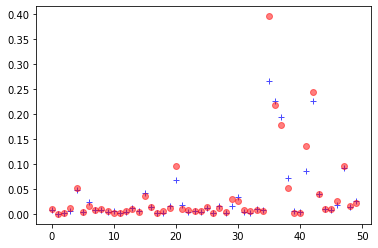

In [34]:
plt.plot(y_validation_RF.as_matrix()[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.show()

In [36]:
import keras

features = np.array(X_train)
targets = np.array(y_train.values.reshape(y_train.shape[0],1))
features_validation= np.array(X_validation)
targets_validation = np.array(y_validation.values.reshape(y_validation.shape[0],1))

print(features[:10])
print(targets[:10])

[[0.63205418 1.         0.         ... 0.         0.         1.        ]
 [0.04853273 1.         0.         ... 0.         0.         0.        ]
 [0.62302483 1.         0.         ... 1.         0.         0.        ]
 ...
 [0.13995485 1.         0.         ... 0.         1.         0.        ]
 [0.83295711 1.         0.         ... 0.         0.         0.        ]
 [0.83295711 1.         0.         ... 0.         0.         0.        ]]
[[0.02834646]
 [0.0015748 ]
 [0.00682415]
 [0.01627297]
 [0.01154856]
 [0.00787402]
 [0.00472441]
 [0.01312336]
 [0.00472441]
 [0.00577428]]


In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                4352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
________________________________________________________________









Step :  0 / 1000
13761/13761 [==============================] - 1s 38us/step
Training MSE: 8.528715585088318e-05
3441/3441 [==============================] - 0s 37us/step
Validation MSE: 0.00014966532407816748 

Step :  250 / 1000
13761/13761 [==============================] - 0s 36us/step
Training MSE: 6.748929302456775e-05
3441/3441 [==============================] - 0s 32us/step
Validation MSE: 0.00015295787535755863 

Step :  500 / 1000
13761/13761 [==============================] - 1s 37us/step
Training MSE: 6.649955792706184e-05
3441/3441 [==============================] - 0s 36us/step
Validation MSE: 0.00016030510689925745 

Step :  750 / 1000
13761/13761 [==============================] - 0s 32us/step
Training MSE: 7.532134997579224e-05
3441/3441 [==============================] - 0s 32us/step
Validation MSE: 0.00016467195779887108 



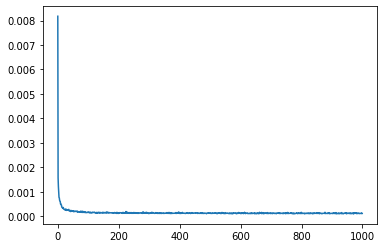

In [38]:
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_validation, targets_validation)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mean_squared_error'])), axis = 0)
    
plt.plot(hist)
plt.show()

In [39]:
predictions = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_validation, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation_RF, predictions), '/ 0.0')

R2 score =  0.8672621639669722 / 1.0
MSE score =  0.0001646719591409442 / 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


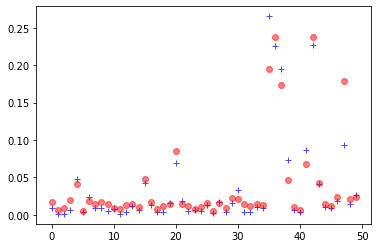

In [40]:
plt.plot(y_validation.as_matrix()[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.show()